1. Load breast cancer dataset (**structured data**)

For more details about the data: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html

In [11]:
from google.colab import auth
auth.authenticate_user()


In [1]:

from sklearn.datasets import load_breast_cancer

my_data = load_breast_cancer()
X = my_data.data
y = my_data.target



2. Visualize the data

- Only **5 points** for visualizing the data
- Use TSNE algorithm: sklearn.manifold.TSNE
- A good and simple code can be found here (they used PCA instead of TSNE): https://skp2707.medium.com/pca-on-cancer-dataset-4d7a97f5fdb8

Visualizing the data using TSNE...


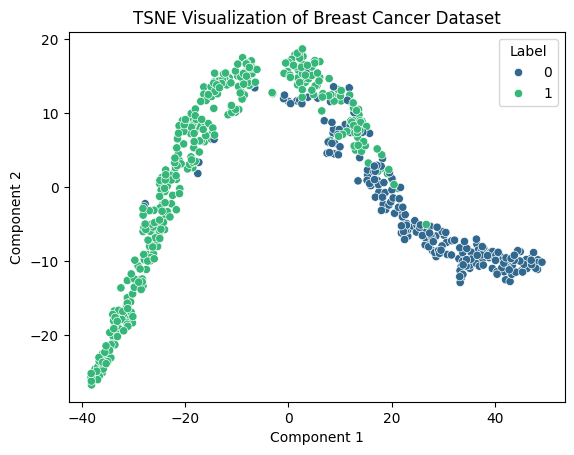

In [2]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("Visualizing the data using TSNE...")
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
tsne_df = pd.DataFrame(X_tsne, columns=['Component 1', 'Component 2'])
tsne_df['Label'] = y

sns.scatterplot(data=tsne_df, x='Component 1', y='Component 2', hue='Label', palette='viridis')
plt.title('TSNE Visualization of Breast Cancer Dataset')
plt.show()





3. Split **my_data** to train and test:

- Define X_train, X_test, Y_train, Y_test
- Choose **test_size** for splitting **my_data**
- Use **train_test_split** (for details: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html)

In [9]:

from sklearn.model_selection import train_test_split

test_size = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=42)


# X_train, X_test, Y_train, Y_test = train_test_split(...)

4. Train **model_decision_tree**

- Library: sklearn.tree.DecisionTreeClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize DecisionTreeClassifier options   

In [4]:
from sklearn.tree import DecisionTreeClassifier

print("Training Decision Tree Classifier...")
model_decision_tree = DecisionTreeClassifier(random_state=42)
model_decision_tree.fit(X_train, Y_train)


# model_decision_tree = DecisionTreeClassifier(...)
# model_decision_tree.fit(...)

Training Decision Tree Classifier...


DecisionTreeClassifier(random_state=42)

5. Train model_random_forest
- Library: sklearn.ensemble.RandomForestClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize RandomForestClassifier options

In [5]:
from sklearn.ensemble import RandomForestClassifier

print("Training Random Forest Classifier...")
model_random_forest = RandomForestClassifier(random_state=42)
model_random_forest.fit(X_train, Y_train)


# model_random_forest = RandomForestClassifier(...)
# model_random_forest.fit(...)

Training Random Forest Classifier...


RandomForestClassifier(random_state=42)

6. Train model_adaboost

- Library: sklearn.ensemble.AdaBoostClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize AdaBoostClassifier options

In [6]:
from sklearn.ensemble import AdaBoostClassifier

print("Training AdaBoost Classifier...")
model_adaboost = AdaBoostClassifier(random_state=42)
model_adaboost.fit(X_train, Y_train)


# model_adaboost = AdaBoostClassifier(...)
# model_adaboost.fit(...)


Training AdaBoost Classifier...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=42)

7. Evaluate model_decision_tree, model_random_forest, model_adaboost

- Library: sklearn.metrics
- Data: X_test, Y_test
- **Calculate** and **print** results of each classifier
- **Choose** the decisive metric
- **Compare** between the classifiers and declare the winner


In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def evaluate_model(model, X_test, Y_test):
    predictions = model.predict(X_test)
    acc = accuracy_score(Y_test, predictions)
    cm = confusion_matrix(Y_test, predictions)
    precision = precision_score(Y_test, predictions)
    recall = recall_score(Y_test, predictions)
    f1 = f1_score(Y_test, predictions)
    return acc, cm, precision, recall, f1

print("Evaluating models...")
models = {
    'Decision Tree': model_decision_tree,
    'Random Forest': model_random_forest,
    'AdaBoost': model_adaboost
}

results = {}
for model_name, model in models.items():
    acc, cm, precision, recall, f1 = evaluate_model(model, X_test, Y_test)
    results[model_name] = {
        'Accuracy': acc,
        'Confusion Matrix': cm,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    for metric, value in metrics.items():
        if metric == 'Confusion Matrix':
            print(f"{metric}:\n{value}")
        else:
            print(f"{metric}: {value:.4f}")

winner = max(results.items(), key=lambda x: x[1]['F1 Score'])[0]
print(f"\nThe best model based on F1 Score is: {winner}")


Evaluating models...

Model: Decision Tree
Accuracy: 0.9415
Confusion Matrix:
[[ 60   3]
 [  7 101]]
Precision: 0.9712
Recall: 0.9352
F1 Score: 0.9528

Model: Random Forest
Accuracy: 0.9708
Confusion Matrix:
[[ 59   4]
 [  1 107]]
Precision: 0.9640
Recall: 0.9907
F1 Score: 0.9772

Model: AdaBoost
Accuracy: 0.9766
Confusion Matrix:
[[ 61   2]
 [  2 106]]
Precision: 0.9815
Recall: 0.9815
F1 Score: 0.9815

The best model based on F1 Score is: AdaBoost
